# Importando dependências

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


/home/geffte-caetano/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Declarando funções e filtros

In [5]:
def ler_planilha():
    path_planilha = 'SIVEP_2024.xlsx'
    df = pd.read_excel(path_planilha,engine='openpyxl')
    return df

In [4]:
def remover_colunas_vazias(df):
    df = df.dropna(axis=1, how='all')
    return df

In [2]:
def remover_futeis(df):
    mapa_deletar = {
        #Filtrando colunas sobre os dados do paciente
        'SG_UF_INTE',
        'CO_MUN_RES',
        'ID_UNIDADE',
        'CO_UNI_NOT',
        'COD_IDADE',
        'CS_ESCOL_N',
        'ID_MN_RESI',
        'CO_MUN_RES',
        'NM_BAIRRO',
        'CS_ZONA',
        #Vacina covid
        'LOTE_1_COV',
        'LOTE_2_COV',
        'LOTE_REF',
        'LOT_RE_BI',
        'SURTO_SG',
        #Filtrando colunas sobre as doenças/exames
        'REINF'
    }

    df = df.drop(columns=mapa_deletar)
    return df

In [3]:
def proporcao_pacientes_por_sexo(df):
    df_sexo = df['CS_SEXO'].value_counts(normalize=True)
    return df_sexo 

In [6]:
def sintomas_mais_frequente(df):
    mapa_sintomas = {
        'NOSOCOMIAL',
        'AVE_SUINO',
        'FEBRE',
        'TOSSE',
        'GARGANTA',
        'DISPNEIA',
        'DESC_RESP',
        'SATURACAO',
        'DIARREIA',
        'VOMITO',
        'OUTRO_SIN'
    }

    df_sintomas = df[list(mapa_sintomas)]
    
    contagem = df_sintomas.applymap(lambda x: 1 if x == 1 else 0).sum()
    
    df_contagem = pd.DataFrame(contagem, columns=['frequencia']).reset_index()
    df_contagem.columns = ['sintoma', 'frequencia']
    
    return df_contagem

In [7]:
def doenca_mais_frequente(df):
    df_doencas = df['CLASSI_FIN'].value_counts(normalize=True)  
    return df_doencas 

In [9]:
def fator_risco(df):
    df_risco = df['FATOR_RISC'].value_counts(normalize=True)
    return df_risco

In [8]:
def media_idade_pacientes(df):
    idades = df[df['TP_IDADE'] == 3]
    media_idades = df['NU_IDADE_N'].mean() 
    dp_idades = df['NU_IDADE_N'].std()
    return idades, media_idades, dp_idades

In [10]:
def media_idade_pacientes_por_doenca(df):
    pass

In [11]:
def media_idade_pacientes_por_doenca_e_sexo(df):
    pass

# Chamando funções e aplicando filtros

# Pré processamento de dados 

In [12]:
df_sivep = ler_planilha()
df_sivep = remover_colunas_vazias(df_sivep)
df_sivep = remover_futeis(df_sivep)

## calcular proporção de pacientes por sexo

In [26]:
df_sexo = proporcao_pacientes_por_sexo(df_sivep)
df_sexo.head()

CS_SEXO
M    0.508893
F    0.491107
Name: proportion, dtype: float64

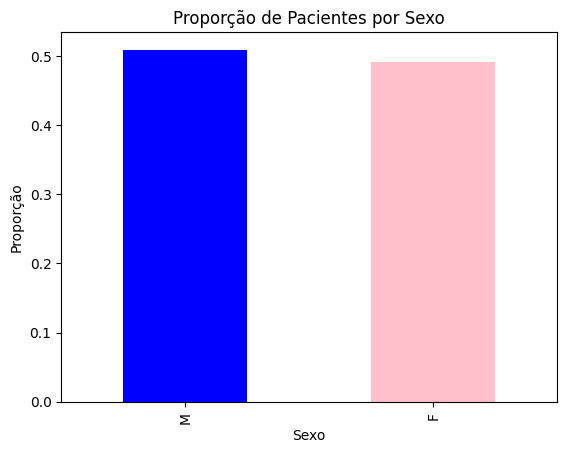

In [27]:
df_sexo.plot(kind='bar', color=['blue', 'pink'])

plt.title('Proporção de Pacientes por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Proporção')
plt.show()


## calcular doenças mais frequentes

In [18]:
df_doencas = doenca_mais_frequente(df_sivep)
df_doencas.rename(index={1: 'SRAG por Influenza', 2: 'SRAG por outro vírus', 3: 'SRAG por outro agente Etiológico', 4: 'SRAG não especificado', 5: 'COVID-19'}, inplace=True)
df_doencas.head()

CLASSI_FIN
SRAG não especificado               0.419273
SRAG por outro vírus                0.341574
SRAG por Influenza                  0.128153
COVID-19                            0.107972
SRAG por outro agente Etiológico    0.003027
Name: proportion, dtype: float64

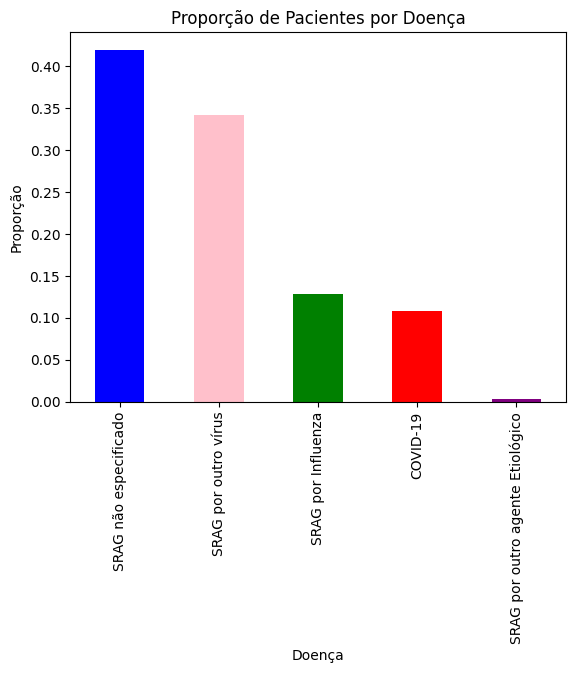

In [19]:
df_doencas.plot(kind='bar', color=['blue', 'pink', 'green', 'red', 'purple'])

plt.title('Proporção de Pacientes por Doença')
plt.xlabel('Doença')
plt.ylabel('Proporção')
plt.show()

## calcular sintomas mais frequentes

In [29]:
df_sintomas = sintomas_mais_frequente(df_sivep)
df_sintomas.head(11)

/tmp/ipykernel_19941/1879116101.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  contagem = df_sintomas.applymap(lambda x: 1 if x == 1 else 0).sum()


,sintoma,frequencia
0,GARGANTA,237
1,DESC_RESP,1588
2,OUTRO_SIN,668
3,SATURACAO,1246
4,NOSOCOMIAL,143
5,FEBRE,1625
6,DIARREIA,214
7,AVE_SUINO,7
8,DISPNEIA,1382
9,VOMITO,240


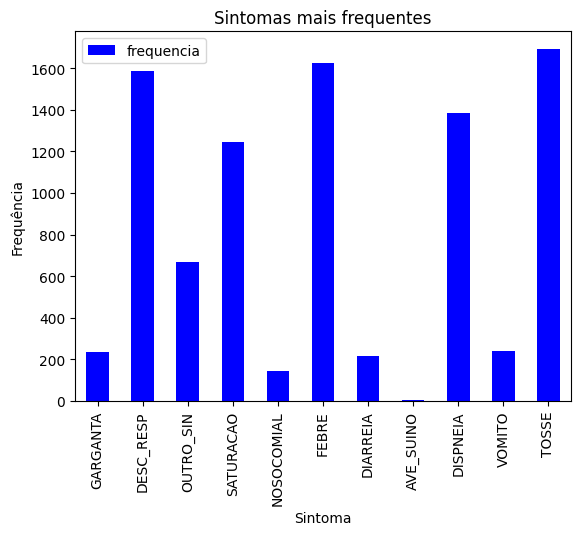

In [16]:
df_sintomas.plot(kind='bar', x='sintoma', y='frequencia', color='blue')

plt.title('Sintomas mais frequentes')
plt.xlabel('Sintoma')
plt.ylabel('Frequência')
plt.show()

## calcular pacientes com fator de risco 

In [25]:
df_risco = fator_risco(df_sivep)
df_risco.rename(index={1: 'Sim', 2: 'Não'}, inplace=True)
df_risco.head()

FATOR_RISC
Sim    0.525692
Não    0.474308
Name: proportion, dtype: float64

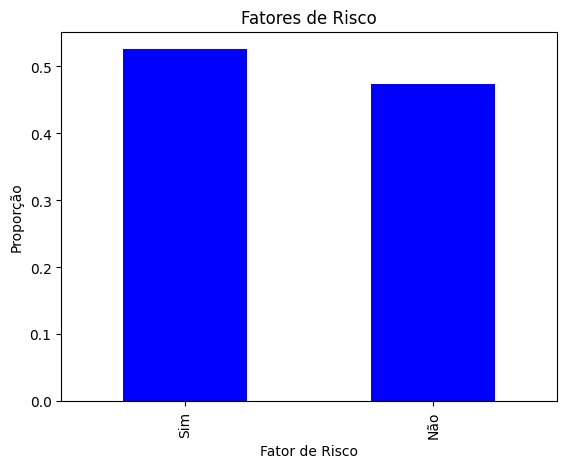

In [26]:
df_risco.plot(kind='bar', color='blue')

plt.title('Fatores de Risco')
plt.xlabel('Fator de Risco')
plt.ylabel('Proporção')
plt.show()

## calcular media de idade dos pacientes

In [41]:
df_idades, media_idades, dp_idades = media_idade_pacientes(df_sivep)

valores_x = np.linspace(df_idades['NU_IDADE_N'].min(), df_idades['NU_IDADE_N'].max(), 100)
valores_y = norm.pdf(valores_x, media_idades, dp_idades)

In [43]:
print(f'Média de idades: {media_idades}')
print(f'Desvio padrão de idades: {dp_idades}')

Média de idades: 29.400691699604742
Desvio padrão de idades: 31.05436719233022


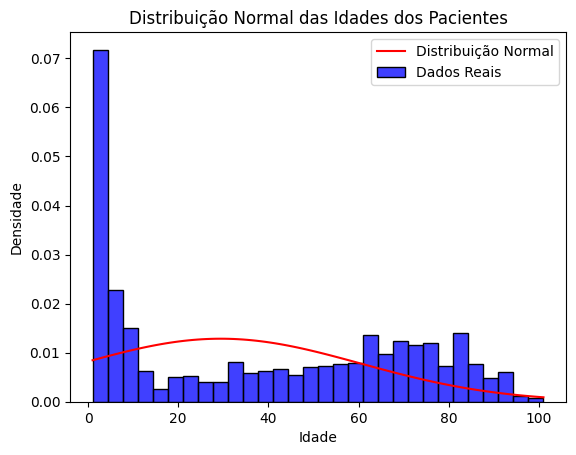

In [42]:
sns.histplot(df_idades['NU_IDADE_N'], kde=False, color='blue', stat='density', bins=30, label='Dados Reais')

plt.plot(valores_x, valores_y, color='red', label='Distribuição Normal')

plt.title('Distribuição Normal das Idades dos Pacientes')
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.legend()

plt.show()

## calcular media de idade dos pacientes por doença

## calcular media de idade dos pacientes por doença e por sexo